In [16]:

%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
pd.options.display.mpl_style = 'default'

import inspect, os
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
os.sys.path.insert(0,parentdir) 
from src.dashboard_helpers import Test, custom_amount_stats
from src.data_retrieval import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
a = 'B14_1130_fl_fl_enUS'
b = 'B14_1130_fl_tp_enUS'
t = Test(a, b, start = '2014-11-30 16:00', stop  = '2014-11-30 18:00')

In [20]:
t.ecom()

,B14_1130_fl_fl_enUS,B14_1130_fl_tp_enUS
donations,3645,856
impressions,367500,880900
dons/i,0.00992,0.00097
amount,46689,12031
amount/i,0.12705,0.01366
clicks,5144,1204
clicks/i,0.01400,0.00137
dons/clicks,0.70859,0.71096
amount_ro,38149,10431
amount_ro/i,0.10381,0.01184


In [23]:
t.get_payment_method_details()

donations  clicks conversion_rate  \
B14_1130_fl_fl_enUS amazon         639     822           77.74   
                    cc            1094    1908           57.34   
                    paypal        1836    2294           80.03   
                    rcc             48      78           61.54   
                    rpaypal         28      42           66.67   
B14_1130_fl_tp_enUS amazon         151     205           73.66   
                    cc             248     430           57.67   
                    paypal         444     548           81.02   
                    rcc              6      13           46.15   
                    rpaypal          7       8           87.50   

                            percent clicked on percent donated on  \
B14_1130_fl_fl_enUS amazon               15.98              17.53   
                    cc                   37.09              30.01   
                    paypal               44.60              50.37   
                    rcc                   1.52               1.32   
                    rpaypal               0.82               0.77   
B14_1130_fl_tp_enUS amazon               17.03              17.64   
                    cc                   35.71              28.97   
                    paypal               45.51              51.87   
                    rcc                   1.08               0.70   
                    rpaypal               0.66               0.82   

                             total_amount ave_amount_ro  
B14_1130_fl_fl_enUS amazon        7540.00         10.02  
                    cc           17818.00         13.28  
                    paypal       20944.45          9.63  
                    rcc            274.00          5.71  
                    rpaypal        113.00          4.04  
B14_1130_fl_tp_enUS amazon        2064.00         11.92  
                    cc            4409.76         15.04  
                    paypal        5499.00         11.39  
                    rcc             27.00          4.50  
                    rpaypal         32.00          4.57

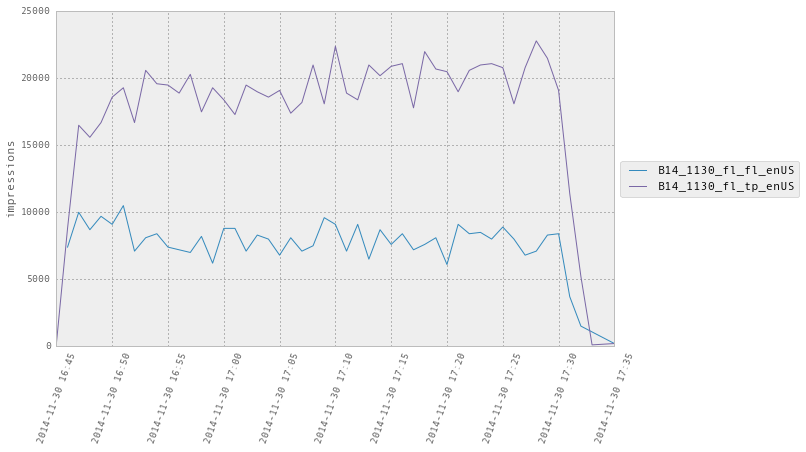

In [11]:
t.plot_impressions(a, b, smooth = 1, stop = '2014-11-30 17:35')

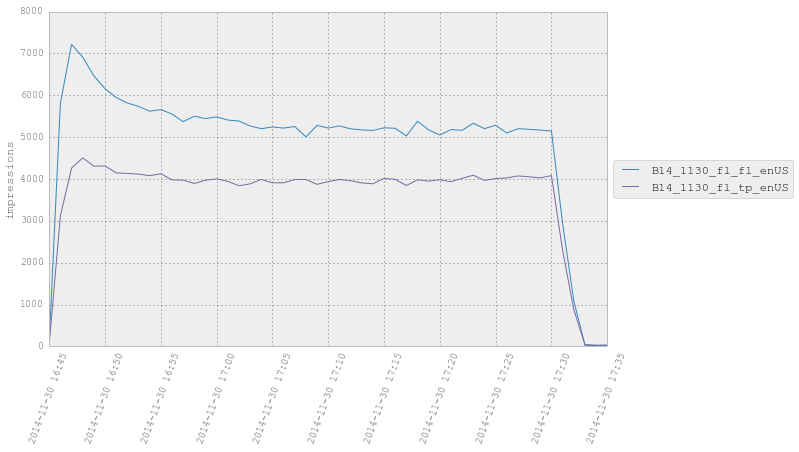

In [16]:
t_hive.plot_impressions(a, b, smooth = 1, stop = '2014-11-30 17:35')

,P(Winner),Winners Lift,CI
B14_1130_fl_fl_enUS,1,"(0.00%, 0.00%)","(0.009655, 0.010192)"
B14_1130_fl_tp_enUS,NaN,"(859.07%, 986.17%)","(0.000919, 0.001028)"


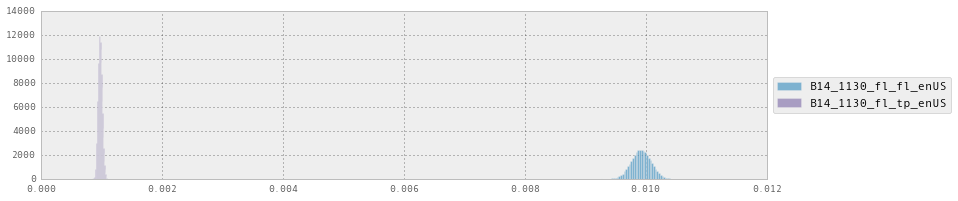

In [12]:
t.rate_stats( a, b, conf = 90, rate = 'donations/impressions')

In [44]:
t.amount_stats( a, b, conf = 90, rate = 'donations/impressions')

B14_1027_enUS_ipd_hl_ls gives between $-0.0998 and $-0.0282 more $/1000 impressions than B14_1027_enUS_ipd_hl_mr


In [45]:
t.amount_stats( a, b, conf = 90, rate = 'donations/clicks')

B14_1027_enUS_ipd_hl_ls gives between $-9.3646 and $8.2806 more $/clicks than B14_1027_enUS_ipd_hl_mr


In [1]:
t.compare_donation_amounts(a, b )

NameError: name 't' is not defined

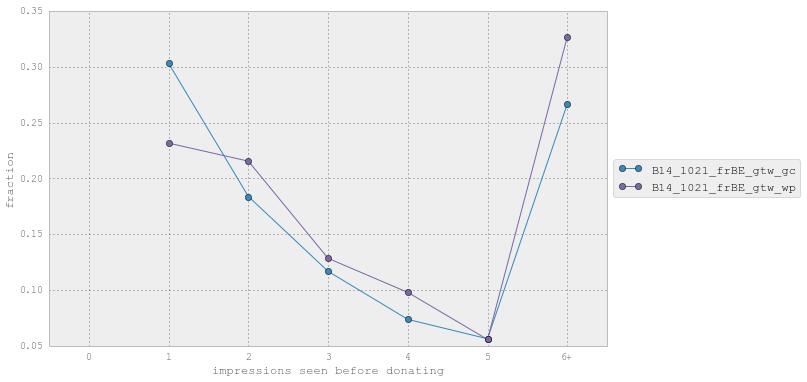

In [22]:
t.plot_utm_key(a, b, max_key = 5, normalize = True)

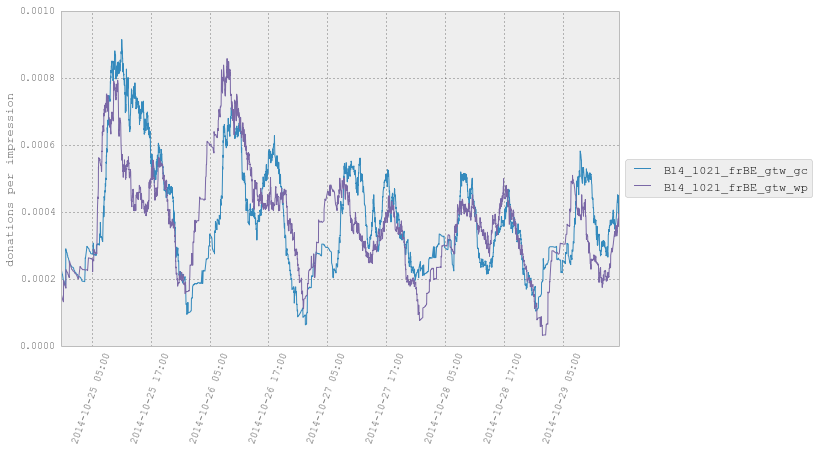

In [29]:
t.plot_donations_over_time(a, b, smooth = 100, amount = False)